#SAVYASACHI                                   12113015
#NIT KURUKSHETRA


# IMPORTING LIBRARIES

In [1]:
#GENERAL LIBRARIES 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import  accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# LIBRARIES FOR NLP
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import re 

# LIBRARIES FOR VISUALISATION
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data

In [2]:
#storing data in data frame 
df = pd.read_csv('C:/Users/HP/Videos/task/ris11Text.csv/train.csv') 

In [3]:
#printing top 8 values 
df.head(5)

,text,Y
0,advice Talk neighbours family exchange phone n...,2
1,Coronavirus Australia: Woolworths give elderly...,2
2,"My food stock one empty... PLEASE, panic, THER...",2
3,"Me, ready go supermarket outbreak. Not I'm par...",0
4,As news regionÂs first confirmed COVID- case ...,2


# Data Visualisation 

In [4]:
# counting values associated with each class
df['Y'].value_counts() 

Y
2    18046
0    15398
1     7708
Name: count, dtype: int64

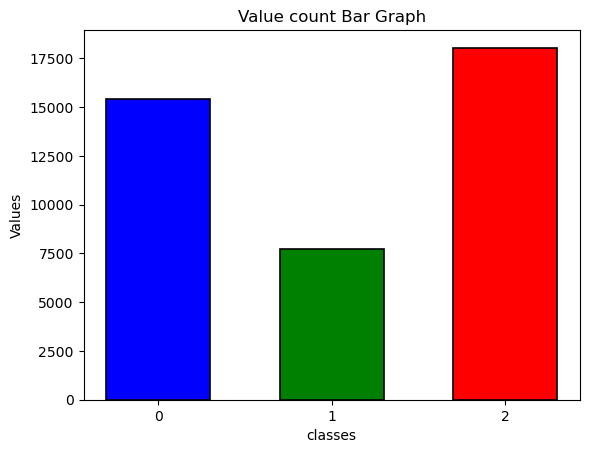

In [5]:
# BAR GRAPH

classes = ['0', '1', '2']
values = [15398, 7708,18046]
colors = ['blue', 'green', 'red']

plt.bar(classes, values, color=colors, width=0.6, edgecolor='black', linewidth=1.2)


plt.xlabel('classes')
plt.ylabel('Values')
plt.title('Value count Bar Graph')

plt.show()

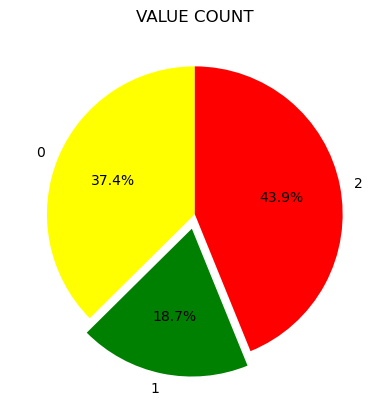

In [6]:
#PIE CHART

labels = ['0', '1', '2']
sizes = [15398, 7708,18046]
colors = ['yellow', 'green', 'red']

# Explode a slice-> with least no of examples
explode = (0, 0.1, 0)


plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode)


plt.title('VALUE COUNT')


plt.show()

# Preprocessing the data :: Using NLTK

### steps of preprocessing:: a) Convert text to LOWERCASE
###                                            bTokenisation , lemmatization and removing stop words
###                                            c)removal of special characters 

In [7]:
# Initialize NLTK Lemmatizer
lemmatizer = WordNetLemmatizer()

# set of NLTK stop words
stop_words = set(stopwords.words('english'))

def preprocess_text_nltk(text):
    # Lowercasing
    text = text.lower()

    # Tokenization, removing stopwords, and lemmatization using NLTK
    tokens_without_stopwords_and_lemmas = [lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text) if word.lower() not in stop_words]

    # Join the lemmatized tokens back into a string
    processed_text = ' '.join(tokens_without_stopwords_and_lemmas)

    return processed_text

# Assuming df['text'] contains the text data
df['processed_text_nltk'] = df['text'].apply(preprocess_text_nltk)


In [8]:
#REMOVING SPECIAL CHARACTERS USING REGULAR EXPRESSION
def remove_special_characters(text):
    cleaned_text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    return cleaned_text


df['processed_text_nltk'] = df['processed_text_nltk'].apply(remove_special_characters)

# DROPPING 'TEXT' FROM DATAFRAME AND WE WILL CONTINUE WORK WITH PROCESSED_TEXT_NLTK
df.drop('text', axis=1, inplace=True)

# Splitting data into Training-Testing(80-20)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df['processed_text_nltk'], df['Y'], test_size=0.20, random_state=37)


# Visualisation on Train-Test DATA

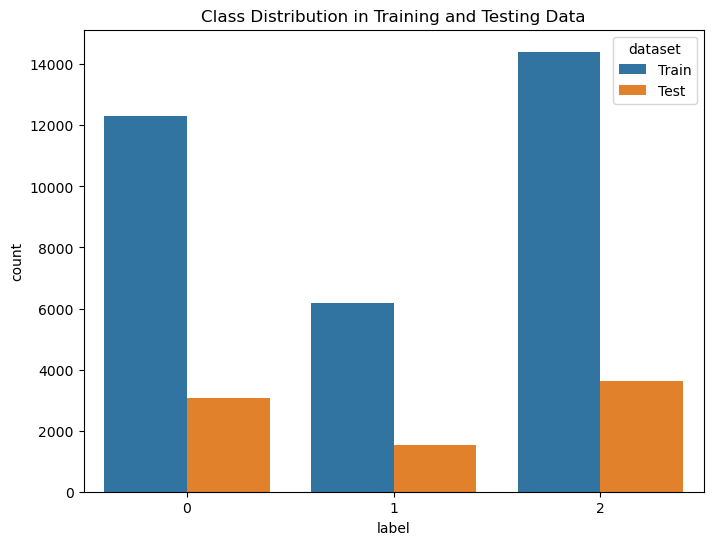

In [10]:
df_visualize = pd.concat([pd.DataFrame({'text': X_train, 'label': y_train, 'dataset': 'Train'}),
                         pd.DataFrame({'text': X_test, 'label': y_test, 'dataset': 'Test'})])


plt.figure(figsize=(8, 6))
sns.countplot(x='label', hue='dataset', data=df_visualize)
plt.title('Class Distribution in Training and Testing Data')
plt.show()

# Choosing MODEL and creating PIPELINE

In [11]:
# SINCE CLASSES ARE IMBALANCED WE ARE USING WEIGHTS  
# WE ARE CHOOSING RANDOM_FOREST AS IT PERFORM BETTER IN UNBALANCED CONDITIONS

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))


# NLP PIPELINE CREATION WITH TF-IDF VECTORIZER AND RANDOM_FOREST CLASSIFIER and weight balancing

nlp_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('rf_classifier', RandomForestClassifier(class_weight=class_weight_dict, random_state=42))
])

# MODEL FITTING AND PREDICTION

## ACCURACY CALCULATION AND CLASSIFICATION REPORT 

In [12]:
# Fit the pipeline on the training data
nlp_pipeline.fit(X_train, y_train)

# Evaluate the pipeline on the test data
accuracy = nlp_pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# Get predictions on the test set
y_pred = nlp_pipeline.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.75
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74      3076
           1       0.68      0.68      0.68      1521
           2       0.77      0.79      0.78      3634

    accuracy                           0.75      8231
   macro avg       0.73      0.73      0.73      8231
weighted avg       0.75      0.75      0.75      8231



# CONFUSION MATRIX 

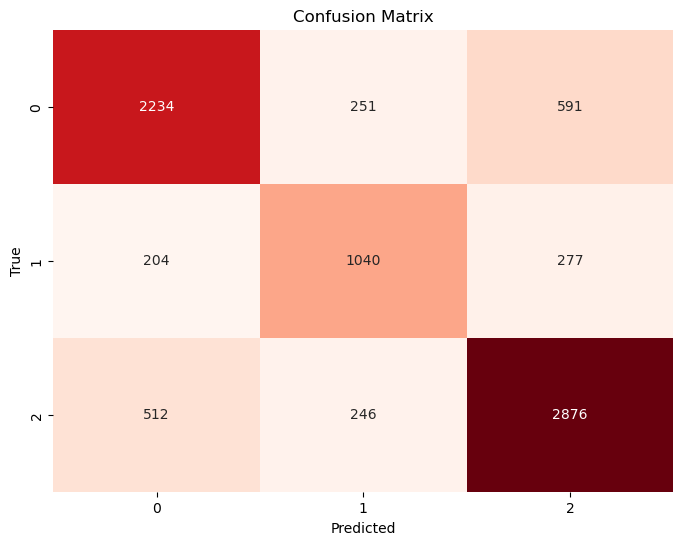

In [13]:
cm = confusion_matrix(y_test, y_pred)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()